## Exercise
### Name: Sophia Angelica Jarobel

### Import libraries in the first cell

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data from SPX

In [10]:
#make sure to use Date as index

df_SPX = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/SPX.csv',
                     index_col='Date', parse_dates=True)

df_SPX

,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,"2,673.61","2,689.15","2,692.12","2,673.61",-0.52%
2017-12-28,"2,687.54","2,686.10","2,687.66","2,682.69",0.18%
2017-12-27,"2,682.62","2,682.10","2,685.64","2,678.91",0.08%
2017-12-26,"2,680.50","2,679.09","2,682.74","2,677.96",-0.11%
2017-12-22,"2,683.34","2,684.22","2,685.35","2,678.13",-0.05%
...,...,...,...,...,...
2006-01-10,"1,289.69","1,290.15","1,290.15","1,283.76",-0.04%
2006-01-09,"1,290.15","1,285.45","1,290.78","1,284.82",0.37%
2006-01-06,"1,285.45","1,273.48","1,286.09","1,273.48",0.94%


### Convert all columns to numerical & Clean columns with str replace

In [11]:
print(df_SPX.dtypes)

Price       object
Open        object
High        object
Low         object
Change %    object
dtype: object


In [12]:
df_SPX['Price'] = pd.to_numeric(df_SPX['Price'].str.replace(',',''))
df_SPX['Open'] = pd.to_numeric(df_SPX['Open'].str.replace(',',''))
df_SPX['High'] = pd.to_numeric(df_SPX['High'].str.replace(',',''))
df_SPX['Low'] = pd.to_numeric(df_SPX['Low'].str.replace(',',''))
df_SPX['Change %'] = pd.to_numeric(df_SPX['Change %'].str.replace('%',''))

In [13]:
df_SPX

,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,2673.61,2689.15,2692.12,2673.61,-0.52
2017-12-28,2687.54,2686.10,2687.66,2682.69,0.18
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05
...,...,...,...,...,...
2006-01-10,1289.69,1290.15,1290.15,1283.76,-0.04
2006-01-09,1290.15,1285.45,1290.78,1284.82,0.37
2006-01-06,1285.45,1273.48,1286.09,1273.48,0.94


### Sort df in chronological order

In [15]:
df_SPX.sort_index(inplace=True)

df_SPX

,Price,Open,High,Low,Change %
Date,,,,,
2006-01-04,1273.46,1268.80,1275.37,1267.74,0.37
2006-01-05,1273.48,1273.46,1276.91,1270.30,0.00
2006-01-06,1285.45,1273.48,1286.09,1273.48,0.94
2006-01-09,1290.15,1285.45,1290.78,1284.82,0.37
2006-01-10,1289.69,1290.15,1290.15,1283.76,-0.04
...,...,...,...,...,...
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08


### Plot line chart (June 2015 to June 2016, High to Low)

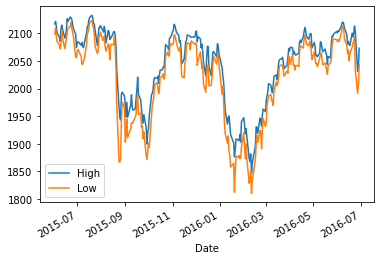

In [20]:
SPX_line = df_SPX.sort_values('Date').query("'2015-06-01' < Date and Date < '2016-06-30'")[['High', 'Low']]

SPX_line.plot()

### Find min, max, average, of all columns

In [25]:
by_BMonth = pd.Grouper(freq='BM')

funcs= ['min', 'max', 'mean']

df_SPX.groupby(by_BMonth).agg(funcs)

df_SPX

,Price,Open,High,Low,Change %
Date,,,,,
2006-01-04,1273.46,1268.80,1275.37,1267.74,0.37
2006-01-05,1273.48,1273.46,1276.91,1270.30,0.00
2006-01-06,1285.45,1273.48,1286.09,1273.48,0.94
2006-01-09,1290.15,1285.45,1290.78,1284.82,0.37
2006-01-10,1289.69,1290.15,1290.15,1283.76,-0.04
...,...,...,...,...,...
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08


### Other visualizations

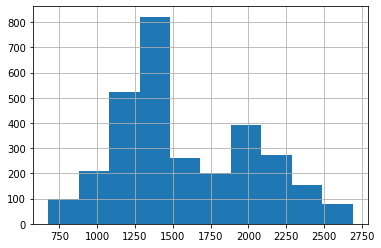

In [27]:
df_SPX['Price'].hist()